In [6]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [7]:
# Discussion Question (a):
# P(Rick and Morty both appear)


In [8]:
# Discussion Question (b)
# P(neither Rick nor Morty appears)


## Random Sampling ##

In [9]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

# lets use python to make a random sampling

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [10]:
# If we wanted to take a random sampling of the rows we would need to complete
# the following steps 

#Step 1 - Make an array of length table length 13815 
sample = np.arange(united.num_rows)
#Step 2 - Choose random numbers from the sample
samplesetarray= np.random.choice(sample,5000)
# this chooses which rows we will pick
#step 3 - use take to get the random rows
united.take(samplesetarray)


# or we can also use the new method sample -

# TableName.sample(number of elements in sample, (optional) with_replacement= True or False)
# False = sample without replacement
# True = sample with replacement 

united.sample(5000)


Row,Date,Flight Number,Destination,Delay
9671,8/4/15,580,PDX,4
1384,6/10/15,587,SNA,-7
4682,7/2/15,502,JFK,1
606,6/5/15,230,AUS,25
6086,7/11/15,1756,BOS,-6
9196,8/1/15,229,IAH,-9
10973,8/12/15,1192,LAX,65
6448,7/14/15,614,SNA,26
12786,8/24/15,1712,IAH,4
9013,7/30/15,1927,IAH,3


In [11]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [12]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [13]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
576,6/4/15,1728,ATL,30
1576,6/11/15,1122,HNL,49
2576,6/18/15,361,LIH,13
3576,6/24/15,1683,EWR,0
4576,7/1/15,1187,EWR,5
5576,7/8/15,1182,LAX,115
6576,7/15/15,322,IAH,2
7576,7/21/15,1523,SEA,72
8576,7/28/15,479,LAX,-7
9576,8/3/15,1586,ORD,-3


## Distributions ##

In [14]:
die = Table().with_column('Face', np.arange(1, 7))
die

# We make a virtual dice

Face
1
2
3
4
5
6


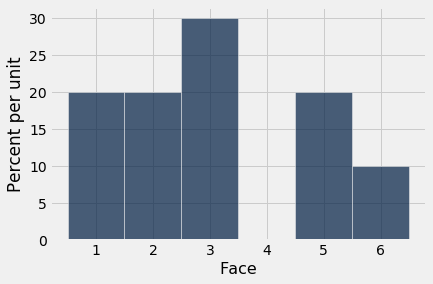

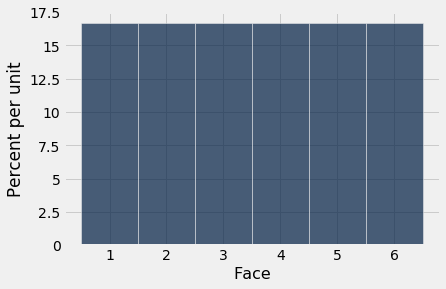

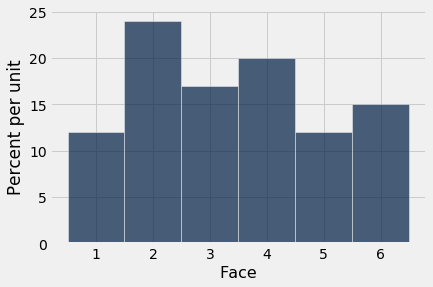

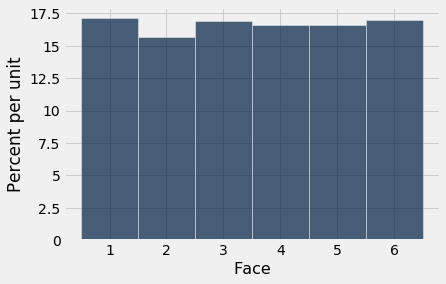

In [15]:
roll = 10         # randomly roll dice 10 times
die.sample(roll)  # This is empircal data or observed data

# lets viusalizir 
die.sample(roll).hist(bins=np.arange(0.5,7.5,1))
# this is an example of an empircal distributipn - random sampling

#the probabliilty disctrubtion is given by the following
die.hist(bins=np.arange(0.5,7.5,1)) #probility distribution. theorticall chance
#The distribution above consists of the theoretical probability of
#each face. It is not based on data. It can be studied and understood 
#without any dice being rolled.

# The power of using random samplings is that if we repeat it many times
# then the proportion of times that an event occurs
#gets closer to the theoretical probability of the event

die.sample(100).hist(bins=np.arange(0.5,7.5,1))
die.sample(10000).hist(bins=np.arange(0.5,7.5,1))

# this is called the Law of Averages / Law of Large Numbers

#As you increase the number of rolls of a die, the proportion  of 
#times you see the face with five spots gets closer to 1/6



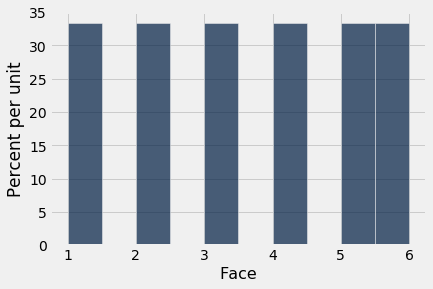

In [16]:
die.hist()

In [17]:
roll_bins = np.arange(0.5, 6.6, 1)

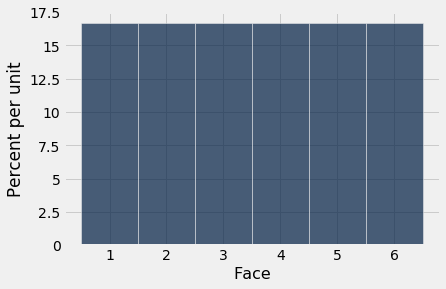

In [18]:
die.hist(bins=roll_bins)

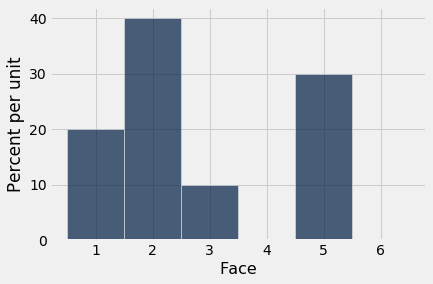

In [19]:
die.sample(10).hist(bins=roll_bins)

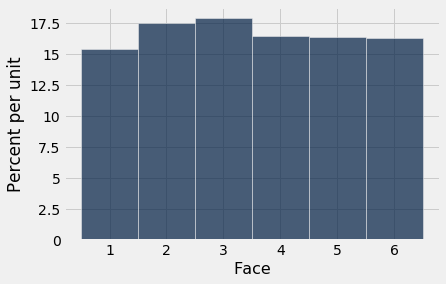

In [20]:
die.sample(1000).hist(bins=roll_bins)

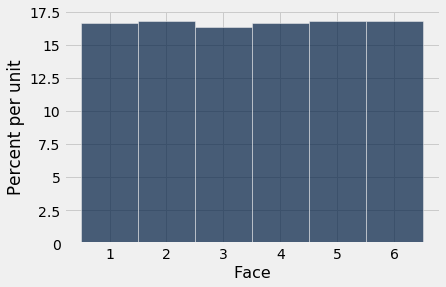

In [21]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

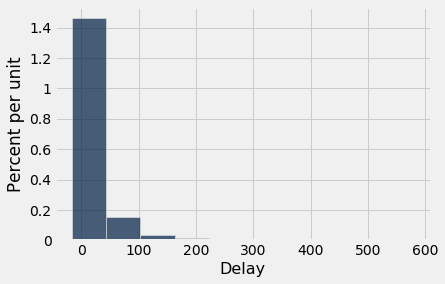

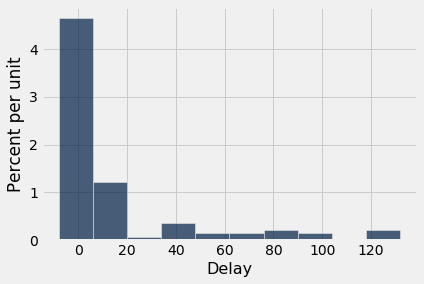

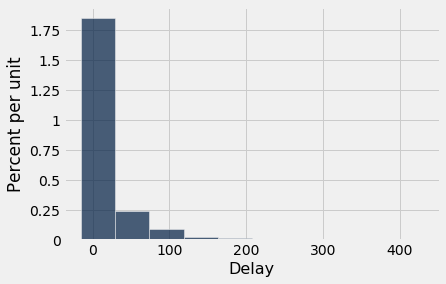

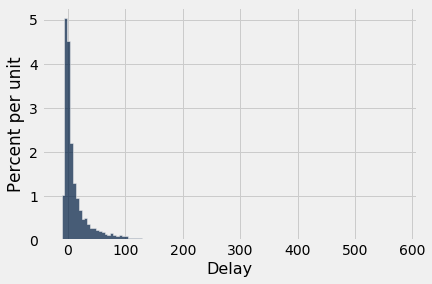

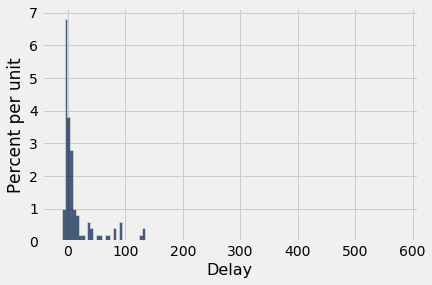

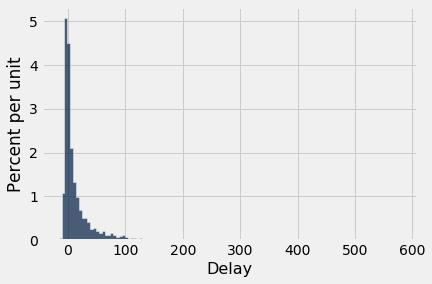

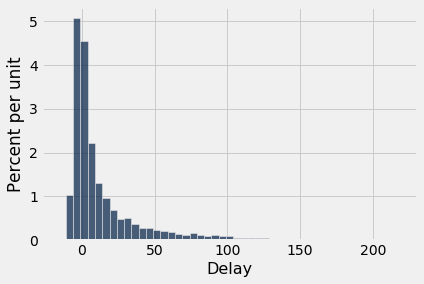

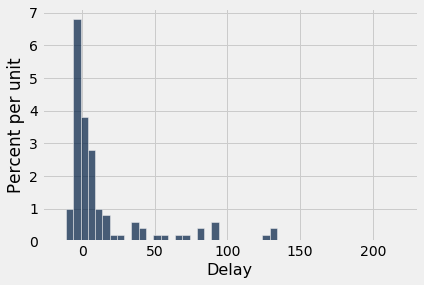

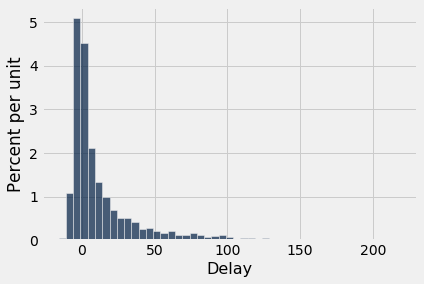

In [32]:
united # united airlines
#right column is delay

#Here is the data set that we looked at last time. 
#This contains A list of flights and the delay in when they left

#Recall we inrtoduced a new method that allowed us to pick a random sample

smallsample=united.sample(100)
largesample= united.sample(5000)

# Lets visualize each of these tables using a histogram on how long a flight was
# delayed
# This will give us a representaiton of distribution when flights are delayed

united.hist('Delay')
smallsample.hist('Delay')
largesample.hist('Delay')

#uhoh the autobins are not to good 
#we need to make our bins 
#we will find the shortest time and the longest delat

lower=min(united.column('Delay'))
upper=max(united.column('Delay'))

bins_delay = np.arange(lower,upper,5)

# now lets try our histograms again


united.hist('Delay',bins = bins_delay)
smallsample.hist('Delay',bins = bins_delay)
largesample.hist('Delay',bins = bins_delay)


# now notice most of the values we notice are less then 200 so 
# lets cut off some data so the we can zoom in the majority of it 
bins_delay = np.arange(lower,220,5)


united.hist('Delay',bins = bins_delay)
smallsample.hist('Delay',bins = bins_delay)
largesample.hist('Delay',bins = bins_delay)


# we can see that cleasty the larger sample resembles more closely th e
# entire sample j

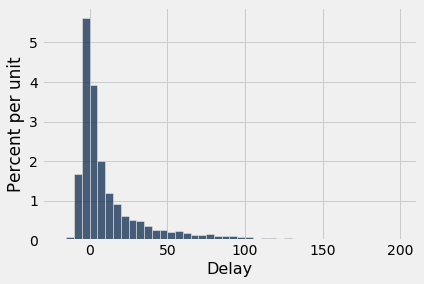

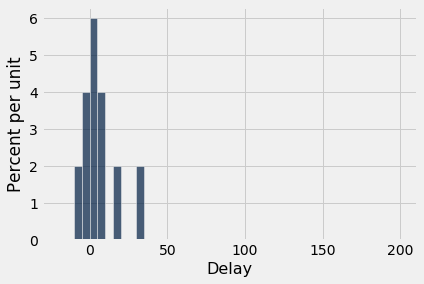

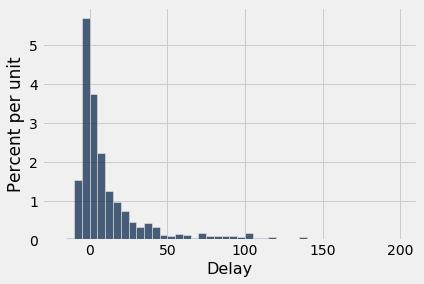

In [59]:
united_bins = np.arange(-20, 201, 5) #bins
united.hist('Delay', bins = united_bins) #total population
united.sample(10).hist('Delay', bins = united_bins) #small random sample
united.sample(1000).hist('Delay', bins = united_bins) #large random sample


In [27]:
min(united.column('Delay'))

-16

In [28]:
max(united.column('Delay'))

580

In [29]:
np.average(united.column('Delay'))

16.658155515370705

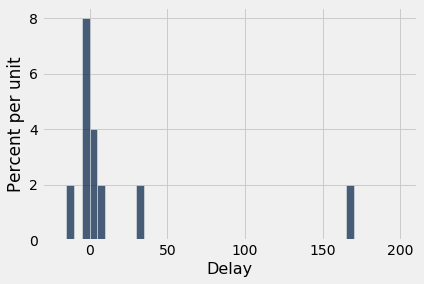

In [30]:
united.sample(10).hist('Delay', bins = united_bins)

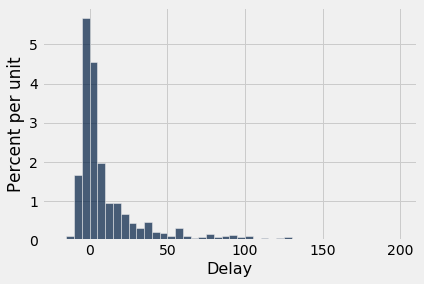

In [31]:
united.sample(1000).hist('Delay', bins = united_bins)

### Simulating Statistics ##

In [39]:
# Lets compute the average and median


np.median(united.column('Delay')) #parameters
np.mean(united.column('Delay'))   # parametesr

# we can also compute the meadin and average of different sample sizes

np.average(united.sample(10).column('Delay')) #Statsitics
np.mean(united.sample(10).column('Delay'))   # statics



# Increasing our sample size we should get closer to the acutal values

np.average(united.sample(5000).column('Delay')) #Statsitics
np.mean(united.sample(5000).column('Delay'))   # statics


# lets make a function that computes this for us for a given 
#sample

def sample_average(size):
    return np.mean(united.sample(size).column('Delay')) 



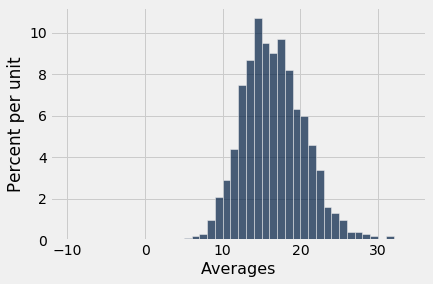

In [46]:
sample_averages= make_array()

# sample_average is running one sample once and finding the average
# the larger the number the more accurate the measurement

# the for loops is running the sampling 1000 times 
# this gives average values for 1000 iterations 
# there for we can give an estimation on what the values could be!

# first lets look at how it changes with a sample small eaxh iteration
# Then lets look at a large sample for the next iteration

for i in np.arange(1000):
    new_average = sample_average(100)
    sample_averages = np.append(sample_averages,new_average)
    
sample_averages

Table().with_columns('Averages',sample_averages).hist(bins = np.arange(-10,35))

In [34]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [35]:
sample_median(10)

2.0

In [36]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

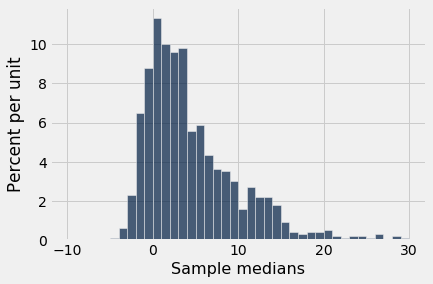

In [37]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [38]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000sample
    sample_medians = np.append(sample_medians, new_median)

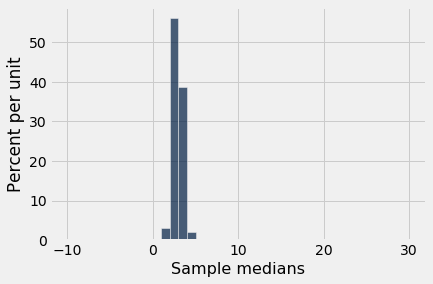

In [39]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))